# Preprocessing Data for Neural Networks

To preprocess data for use in a neural network, the first step is to standardize each feature.

In [1]:
# Load libraries
from sklearn import preprocessing
import numpy as np

In [2]:
# Create feature
features = np.array([[-100.1, 3240.1],
[-200.2, -234.1],
[5000.5, 150.1],
[6000.6, -125.1],
[9000.9, -673.1]])


In [3]:
# Create scaler
scaler = preprocessing.StandardScaler()

In [4]:
# Transform the feature
features_standardized = scaler.fit_transform(features)

In [5]:
# Show feature
features_standardized


array([[-1.12541308,  1.96429418],
       [-1.15329466, -0.50068741],
       [ 0.29529406, -0.22809346],
       [ 0.57385917, -0.42335076],
       [ 1.40955451, -0.81216255]])

In [6]:
# Print mean and standard deviation
print("Mean:", round(features_standardized[:,0].mean()))
print("Standard deviation:", features_standardized[:,0].std())


Mean: 0
Standard deviation: 0.9999999999999999


# Designing a Neural Network

In [7]:
# Load libraries
from keras import models
from keras import layers


Using TensorFlow backend.
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:522: FutureWarn

In [8]:
# Start neural network
network = models.Sequential()


In [9]:
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu", input_shape=(10,)))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))
# Compile neural network


In [10]:
network.compile(loss="binary_crossentropy", # Cross-entropy
optimizer="rmsprop", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric

# Training a Binary Classifier

In [11]:
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers


In [12]:
# Set random seed
np.random.seed(0)
# Set the number of features we want
number_of_features = 1000


In [13]:
# save np.load
np_load_old = np.load
# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)
np.load = np_load_old
# Convert movie review data to one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")


/anaconda3/lib/python3.6/site-packages/keras/datasets/imdb.py:99: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/anaconda3/lib/python3.6/site-packages/keras/datasets/imdb.py:100: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [14]:
# Start neural network
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu", input_shape=(
number_of_features,)))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))
# Compile neural network
network.compile(loss="binary_crossentropy", # Cross-entropy
optimizer="rmsprop", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric


In [15]:
# Train neural network
history = network.fit(features_train, # Features
target_train, # Target vector
epochs=3, # Number of epochs
verbose=1, # Print description after each epoch
batch_size=100, # Number of observations per batch
validation_data=(features_test, target_test)) # Test data

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 1s 53us/step - loss: 0.4161 - acc: 0.8130 - val_loss: 0.3352 - val_acc: 0.8583
Epoch 2/3
25000/25000 [==============================] - 1s 31us/step - loss: 0.3244 - acc: 0.8640 - val_loss: 0.3297 - val_acc: 0.8603
Epoch 3/3
25000/25000 [==============================] - 1s 31us/step - loss: 0.3155 - acc: 0.8664 - val_loss: 0.3307 - val_acc: 0.8600


In [16]:
# Predict classes of test set
predicted_target = network.predict(features_test)

In [17]:
predicted_target

array([[0.25846568],
       [0.9981668 ],
       [0.54167444],
       ...,
       [0.13669962],
       [0.0948423 ],
       [0.46078542]], dtype=float32)

In [19]:
# View the probability the first observation is class 1
predicted_target[1]

array([0.9981668], dtype=float32)

# Visualize Training History

In [20]:
# Get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

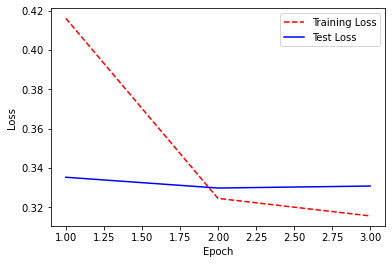

In [21]:
import matplotlib.pyplot as plt
# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Second Approach

In [22]:
# Get training and test accuracy histories
training_accuracy = history.history["acc"]
test_accuracy = history.history["val_acc"]


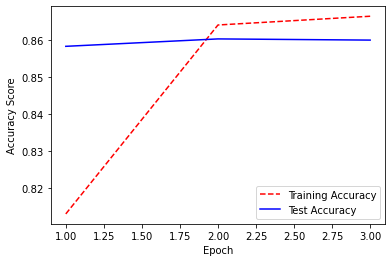

In [23]:
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
# Visualize accuracy history
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show()

# Reducing Overfitting with Early Stopping

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# Set random seed
np.random.seed(0)
# Set the number of features we want
number_of_features = 1000
# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(
num_words=number_of_features)
# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

In [ ]:
# Start NN
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16,
activation="relu",
input_shape=(number_of_features,)))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))
# Compile neural network
network.compile(loss="binary_crossentropy", # Cross-entropy
optimizer="rmsprop", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric

In [ ]:
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor="val_loss", patience=2),
ModelCheckpoint(filepath="best_model.h5", monitor="val_loss", save_best_only=True)]

In [ ]:
# Train neural network
history = network.fit(features_train, # Features
target_train, # Target vector
epochs=20, # Number of epochs
callbacks=callbacks, # Early stopping
verbose=0, # Print description after each epoch
batch_size=100, # Number of observations per batch
validation_data=(features_test, target_test)) # Test data